<a href="https://colab.research.google.com/github/Chris-Adigwe/Median-house-value-predictions/blob/master/Project_1_Housing_Predictions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#import libaries 
import pandas as pd
import os #dealing with files 

In [ ]:
#import the data
from google.colab import files
files.upload()

Saving housing.csv to housing.csv


{'housing.csv': b'longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity\n-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY\n-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY\n-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY\n-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY\n-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY\n-122.25,37.85,52.0,919.0,213.0,413.0,193.0,4.0368,269700.0,NEAR BAY\n-122.25,37.84,52.0,2535.0,489.0,1094.0,514.0,3.6591,299200.0,NEAR BAY\n-122.25,37.84,52.0,3104.0,687.0,1157.0,647.0,3.12,241400.0,NEAR BAY\n-122.26,37.84,42.0,2555.0,665.0,1206.0,595.0,2.0804,226700.0,NEAR BAY\n-122.25,37.84,52.0,3549.0,707.0,1551.0,714.0,3.6912,261100.0,NEAR BAY\n-122.26,37.85,52.0,2202.0,434.0,910.0,402.0,3.2031,281500.0,NEAR BAY\n-122.26,37.85,52.0,3503.0,752.0,1504.0,734.0,3.2705,241800.0,NEAR BAY\n-

In [ ]:
#read the data and print out the first 5 entires 
housing = pd.read_csv('housing.csv')
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


We use Median instead of average to help us deal with the issue of outlier because if any of the datapoint is bad then we will have a bad average



what is the business objective

How does the company expect to use and benefit from the model


Above questions helps in determining
how to frame the problem
which alogrithm to use 
performance measures to evaluate the model 
effort required to tweaking it

if our RMSE is large then the model is bad

Each row represent a district 



In [ ]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [ ]:
housing['ocean_proximity'].value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

In [ ]:
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


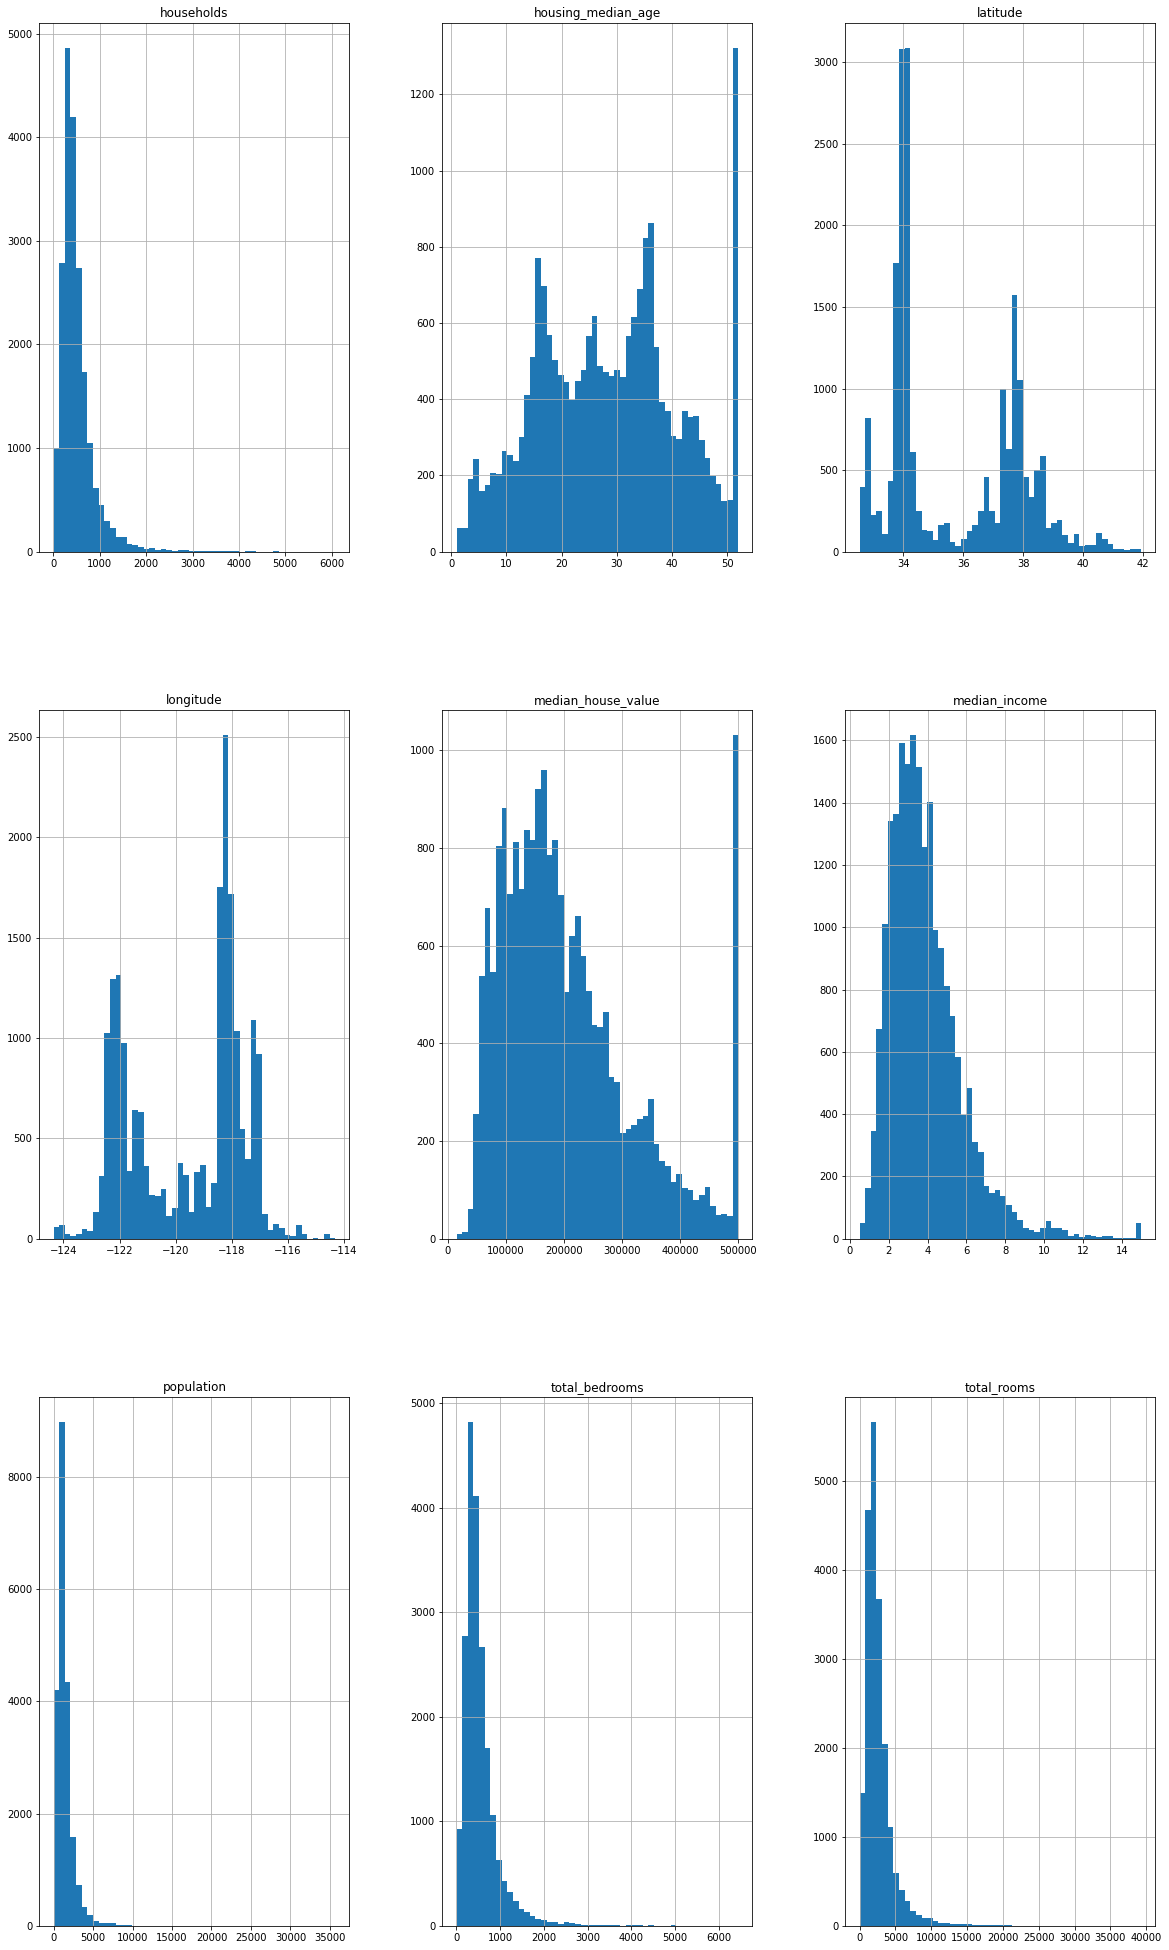

In [ ]:
#to plot the data 
#let plot a histogram for the numerical attributes
%matplotlib inline
import matplotlib.pyplot as plt
housing.hist(bins=50, figsize=(20,35))
plt.show()

Observations
For the median_income values the last value is high because we have capped the value
 Mean at 15.0001 was for people with  higher incomes and at 0.4999 was for people with lower income


 Also median age was capped ar 50
 meadian house value at 500,000


 the tail is too big for population and total_bedrooms


 

we train the data on the train data and evaluate on the test data

In [ ]:
#to make the output identical at every run 

import numpy as np

np.random.seed(42)  #this makes the output identical

#example
np.random.random()

0.3745401188473625

In [ ]:
#split the data into Training (80%) and test data (20% of the data)
from sklearn.model_selection import train_test_split
np.random.seed(42)
train_set, test_set = train_test_split(housing, test_size=0.2, random_state=42)

print(len(train_set), "train +", len(test_set), "test")

test_set.head()

16512 train + 4128 test


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
20046,-119.01,36.06,25.0,1505.0,NaN,1392.0,359.0,1.6812,47700.0,INLAND
3024,-119.46,35.14,30.0,2943.0,NaN,1565.0,584.0,2.5313,45800.0,INLAND
15663,-122.44,37.80,52.0,3830.0,NaN,1310.0,963.0,3.4801,500001.0,NEAR BAY
20484,-118.72,34.28,17.0,3051.0,NaN,1705.0,495.0,5.7376,218600.0,<1H OCEAN
9814,-121.93,36.62,34.0,2351.0,NaN,1063.0,428.0,3.7250,278000.0,NEAR OCEAN


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f37d4546828>,
      dtype=object)

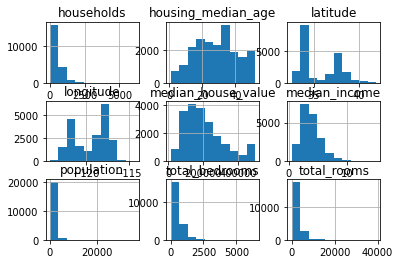

In [ ]:
housing.hist()

Pure random sampling has the potential to be bias if the sample is not the representaion of the population which is called sampling bias

it occurs when you have a coveinent sample, voluntary response, non response

Sampling methods 
Simple random sampling 
Cluster sampling 
stratified sampling

if the median income is very important attribute to predict median prices then then the test set should be a representative of the various categories of median income

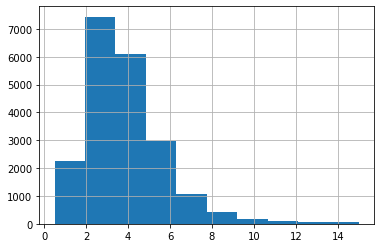

In [ ]:
housing['median_income'].hist()

In [ ]:
np.ceil(2.1) #round the number to its uppervalue

3.0

We created a income category

In [ ]:
housing['income_cat'] = np.ceil(housing['median_income']/1.5) #this form a series object because a column a series

In [ ]:
housing['income_cat'].value_counts()

3.0     7236
2.0     6581
4.0     3639
5.0     1423
1.0      822
6.0      532
7.0      189
8.0      105
9.0       50
11.0      49
10.0      14
Name: income_cat, dtype: int64

In [ ]:
housing['income_cat'].where(housing['income_cat']<5, 5.0, inplace=True) #where housing[income_cat] is greater than 5 put 5

In [ ]:
housing['income_cat'].value_counts()

3.0    7236
2.0    6581
4.0    3639
5.0    2362
1.0     822
Name: income_cat, dtype: int64

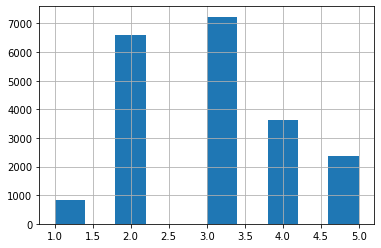

In [ ]:
housing['income_cat'].hist()

In [ ]:
#stratified random sampling using skilearn

from sklearn.model_selection import StratifiedShuffleSplit


split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in split.split(housing, housing['income_cat']):
  strat_train_set = housing.loc[train_index]
  print('hello')
  strat_test_set = housing.loc[test_index]

hello


In [ ]:
strat_test_set['income_cat'].value_counts()/len(strat_test_set)

3.0    0.350533
2.0    0.318798
4.0    0.176357
5.0    0.114583
1.0    0.039729
Name: income_cat, dtype: float64

In [ ]:
housing['income_cat'].value_counts()/len(housing)

3.0    0.350581
2.0    0.318847
4.0    0.176308
5.0    0.114438
1.0    0.039826
Name: income_cat, dtype: float64

In [ ]:
#let compare income category in Stratified sampling and random sampling

def income_cat_proportions(data):
  return data['income_cat'].value_counts()/len(data)


train_set, test_set = train_test_split(housing, test_size=0.2, random_state=42)

compare_props = pd.DataFrame({
    "Overall": income_cat_proportions(housing),
    "Stratified": income_cat_proportions(strat_test_set),
    "Random": income_cat_proportions(test_set),
}).sort_index()

compare_props['Rand. %error'] = 100 * compare_props['Random']/compare_props['Overall'] - 100
compare_props['Strat. %error'] = 100 * compare_props['Stratified']/compare_props['Overall'] - 100

In [ ]:
compare_props

,Overall,Stratified,Random,Rand. %error,Strat. %error
1.0,0.039826,0.039729,0.040213,0.973236,-0.243309
2.0,0.318847,0.318798,0.324370,1.732260,-0.015195
3.0,0.350581,0.350533,0.358527,2.266446,-0.013820
4.0,0.176308,0.176357,0.167393,-5.056334,0.027480
5.0,0.114438,0.114583,0.109496,-4.318374,0.127011


In [ ]:
#drop the income_cat
for set_ in (strat_train_set, strat_test_set):
  set_.drop('income_cat', axis=1, inplace=True)

Discover and visualise the data to gain insight 

In [ ]:
#to create a copy of the training set
housing = strat_train_set.copy()

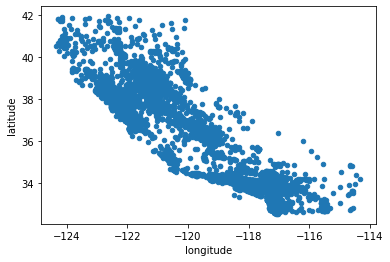

In [ ]:
housing.plot(kind='scatter', x='longitude', y='latitude')

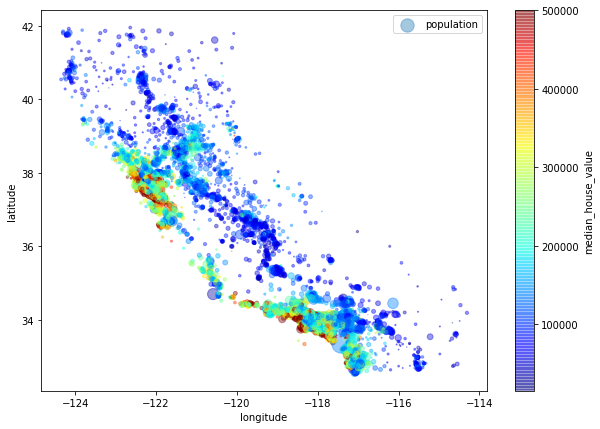

In [ ]:
housing.plot(kind='scatter', x='longitude', y='latitude', alpha=0.4,
             s=housing['population']/100, label='population', figsize=(10,7),
             c='median_house_value', cmap=plt.get_cmap('jet'), colorbar=True,
             sharex=False
             )   #alpha is for transulent meaning one layer darker than another cmap means the color of the map should be color jet
plt.legend()

In [ ]:
corr_matrix = housing.corr()
corr_matrix

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
longitude,1.000000,-0.924478,-0.105848,0.048871,0.076598,0.108030,0.063070,-0.019583,-0.047432
latitude,-0.924478,1.000000,0.005766,-0.039184,-0.072419,-0.115222,-0.077647,-0.075205,-0.142724
housing_median_age,-0.105848,0.005766,1.000000,-0.364509,-0.325047,-0.298710,-0.306428,-0.111360,0.114110
total_rooms,0.048871,-0.039184,-0.364509,1.000000,0.929379,0.855109,0.918392,0.200087,0.135097
total_bedrooms,0.076598,-0.072419,-0.325047,0.929379,1.000000,0.876320,0.980170,-0.009740,0.047689
population,0.108030,-0.115222,-0.298710,0.855109,0.876320,1.000000,0.904637,0.002380,-0.026920
households,0.063070,-0.077647,-0.306428,0.918392,0.980170,0.904637,1.000000,0.010781,0.064506
median_income,-0.019583,-0.075205,-0.111360,0.200087,-0.009740,0.002380,0.010781,1.000000,0.687160
median_house_value,-0.047432,-0.142724,0.114110,0.135097,0.047689,-0.026920,0.064506,0.687160,1.000000


In [ ]:
corr_matrix['median_house_value'].sort_values(ascending=False)

median_house_value    1.000000
median_income         0.687160
total_rooms           0.135097
housing_median_age    0.114110
households            0.064506
total_bedrooms        0.047689
population           -0.026920
longitude            -0.047432
latitude             -0.142724
Name: median_house_value, dtype: float64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f37c955d780>,
      dtype=object)

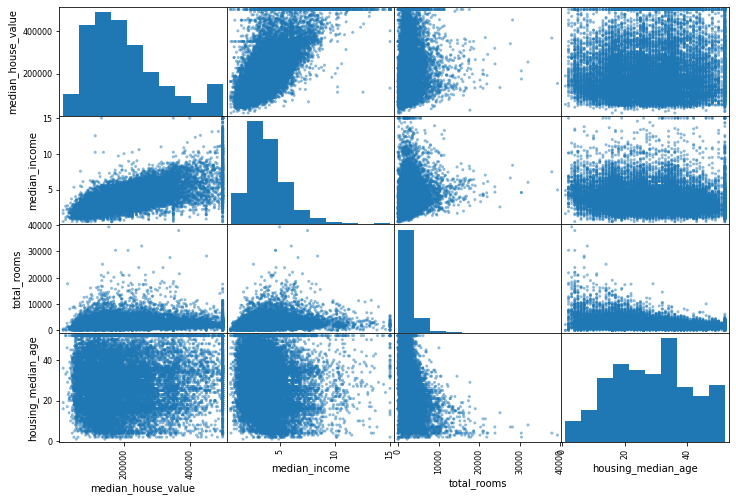

In [ ]:
#to plot with pandas
from pandas.plotting import scatter_matrix

attributtes = ['median_house_value', 'median_income', 'total_rooms', 'housing_median_age']
scatter_matrix(housing[attributtes], figsize=(12,8))

(0.0, 16.0, 0.0, 550000.0)

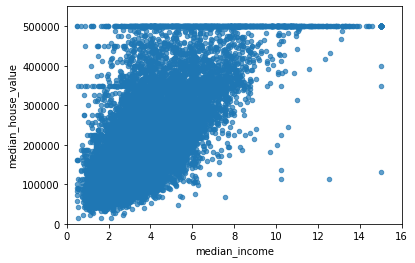

In [ ]:
housing.plot(kind='scatter', x='median_income', y='median_house_value', alpha=0.7)
plt.axis((0,16,0,550000))

In [ ]:
#creating more features
housing['rooms_per_household'] = housing['total_rooms']/housing['households']
housing['bedrooms_per_room'] = housing['total_bedrooms']/housing['total_rooms']
housing['population_per_household'] = housing['population']/housing['households']

In [ ]:
corr_matrix = housing.corr()
corr_matrix

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,rooms_per_household,bedrooms_per_room,population_per_household
longitude,1.000000,-0.924478,-0.105848,0.048871,0.076598,0.108030,0.063070,-0.019583,-0.047432,-0.028345,0.095603,-0.000410
latitude,-0.924478,1.000000,0.005766,-0.039184,-0.072419,-0.115222,-0.077647,-0.075205,-0.142724,0.107621,-0.116884,0.005420
housing_median_age,-0.105848,0.005766,1.000000,-0.364509,-0.325047,-0.298710,-0.306428,-0.111360,0.114110,-0.147186,0.136788,0.015031
total_rooms,0.048871,-0.039184,-0.364509,1.000000,0.929379,0.855109,0.918392,0.200087,0.135097,0.127519,-0.192606,-0.024810
total_bedrooms,0.076598,-0.072419,-0.325047,0.929379,1.000000,0.876320,0.980170,-0.009740,0.047689,0.000377,0.086960,-0.028370
population,0.108030,-0.115222,-0.298710,0.855109,0.876320,1.000000,0.904637,0.002380,-0.026920,-0.074692,0.037778,0.076225
households,0.063070,-0.077647,-0.306428,0.918392,0.980170,0.904637,1.000000,0.010781,0.064506,-0.083009,0.067162,-0.027416
median_income,-0.019583,-0.075205,-0.111360,0.200087,-0.009740,0.002380,0.010781,1.000000,0.687160,0.311563,-0.624674,0.021822
median_house_value,-0.047432,-0.142724,0.114110,0.135097,0.047689,-0.026920,0.064506,0.687160,1.000000,0.146285,-0.259984,-0.021985
rooms_per_household,-0.028345,0.107621,-0.147186,0.127519,0.000377,-0.074692,-0.083009,0.311563,0.146285,1.000000,-0.398546,-0.005314


In [ ]:
corr_matrix['median_house_value'].sort_values(ascending=False)

median_house_value          1.000000
median_income               0.687160
rooms_per_household         0.146285
total_rooms                 0.135097
housing_median_age          0.114110
households                  0.064506
total_bedrooms              0.047689
population_per_household   -0.021985
population                 -0.026920
longitude                  -0.047432
latitude                   -0.142724
bedrooms_per_room          -0.259984
Name: median_house_value, dtype: float64

In [ ]:
#preapare the features and the labels
housing = strat_train_set.drop('median_house_value', axis=1)
housing_labels = strat_train_set['median_house_value'].copy()

In [ ]:
#treat missing rows
sample_incomplete_rows = housing[housing.isnull().any(axis=1)].head()
sample_incomplete_rows

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
4629,-118.30,34.07,18.0,3759.0,NaN,3296.0,1462.0,2.2708,<1H OCEAN
6068,-117.86,34.01,16.0,4632.0,NaN,3038.0,727.0,5.1762,<1H OCEAN
17923,-121.97,37.35,30.0,1955.0,NaN,999.0,386.0,4.6328,<1H OCEAN
13656,-117.30,34.05,6.0,2155.0,NaN,1039.0,391.0,1.6675,INLAND
19252,-122.79,38.48,7.0,6837.0,NaN,3468.0,1405.0,3.1662,<1H OCEAN


In [ ]:
sample_incomplete_rows.dropna(subset=['total_bedrooms'])

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity


In [ ]:
#use fillna
median = housing['total_bedrooms'].median()

sample_incomplete_rows['total_bedrooms'].fillna(median, inplace=True)
sample_incomplete_rows

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
4629,-118.30,34.07,18.0,3759.0,433.0,3296.0,1462.0,2.2708,<1H OCEAN
6068,-117.86,34.01,16.0,4632.0,433.0,3038.0,727.0,5.1762,<1H OCEAN
17923,-121.97,37.35,30.0,1955.0,433.0,999.0,386.0,4.6328,<1H OCEAN
13656,-117.30,34.05,6.0,2155.0,433.0,1039.0,391.0,1.6675,INLAND
19252,-122.79,38.48,7.0,6837.0,433.0,3468.0,1405.0,3.1662,<1H OCEAN


Using imputer class to fill missing values 

In [ ]:
#creating the imputer class
#from sklearn.preprocessing import SimpleImputer

from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy='median')

In [ ]:
#before we use the imputer class we have to drop the ocean proximity because its not numerical
housing_num = housing.drop('ocean_proximity', axis=1)

#fit the values with imputer 
x = imputer.fit(housing_num)

In [ ]:
imputer.statistics_

array([-118.51  ,   34.26  ,   29.    , 2119.5   ,  433.    , 1164.    ,
        408.    ,    3.5409])

In [ ]:
#transform the training set 
X = imputer.transform(housing_num)
X

array([[-121.89  ,   37.29  ,   38.    , ...,  710.    ,  339.    ,
           2.7042],
       [-121.93  ,   37.05  ,   14.    , ...,  306.    ,  113.    ,
           6.4214],
       [-117.2   ,   32.77  ,   31.    , ...,  936.    ,  462.    ,
           2.8621],
       ...,
       [-116.4   ,   34.09  ,    9.    , ..., 2098.    ,  765.    ,
           3.2723],
       [-118.01  ,   33.82  ,   31.    , ..., 1356.    ,  356.    ,
           4.0625],
       [-122.45  ,   37.77  ,   52.    , ..., 1269.    ,  639.    ,
           3.575 ]])

In [ ]:
housing_tr = pd.DataFrame(X, columns=housing_num.columns)
housing_tr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16512 entries, 0 to 16511
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           16512 non-null  float64
 1   latitude            16512 non-null  float64
 2   housing_median_age  16512 non-null  float64
 3   total_rooms         16512 non-null  float64
 4   total_bedrooms      16512 non-null  float64
 5   population          16512 non-null  float64
 6   households          16512 non-null  float64
 7   median_income       16512 non-null  float64
dtypes: float64(8)
memory usage: 1.0 MB


Processing the categorical data 

In [ ]:
housing_cat = housing['ocean_proximity']
housing_cat

17606     <1H OCEAN
18632     <1H OCEAN
14650    NEAR OCEAN
3230         INLAND
3555      <1H OCEAN
            ...    
6563         INLAND
12053        INLAND
13908        INLAND
11159     <1H OCEAN
15775      NEAR BAY
Name: ocean_proximity, Length: 16512, dtype: object

When changing categorical data to numerical sometimes the computer will also make mistake that two numbers closely to each other are related 

The solution to this one hot encoding

In [ ]:
housing_cat_encoded, housing_categories = housing_cat.factorize() #factorize gives numbers to the name starting from left to the right
housing_cat_encoded

array([0, 0, 1, ..., 2, 0, 3])

In [ ]:
housing_categories 

Index(['<1H OCEAN', 'NEAR OCEAN', 'INLAND', 'NEAR BAY', 'ISLAND'], dtype='object')

In [ ]:
from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder()

housing_cat_1hot = encoder.fit_transform(housing_cat_encoded.reshape(-1,1))
housing_cat_1hot

<16512x5 sparse matrix of type '<class 'numpy.float64'>'
	with 16512 stored elements in Compressed Sparse Row format>

Creating Pipelines for ML

In [ ]:
from sklearn.base import BaseEstimator, TransformerMixin

#column index
rooms_ix, bedrooms_ix, population_ix, household_ix = 3,4,5,6

class CombinedAttributesAdder(BaseEstimator, TransformerMixin):
  def __init__(self, add_bedrooms_per_room = True):#no args or #kargs
      self.add_bedrooms_per_room = add_bedrooms_per_room

  def fit(self, X, y=None):
    return self  #nothing else to do

  def transform(self,X, y=None):
    rooms_per_household = X[:, rooms_ix] / X[:, household_ix]
    population_per_household = X[:, population_ix] / X[:, household_ix]
    if self.add_bedrooms_per_room:
      bedrooms_per_room = X[:, bedrooms_ix] / X[:, rooms_ix]
      return np.c_[X, rooms_per_household, population_per_household,
                  bedrooms_per_room] #np.c means concantenation

    else:
      return np.c_[X, rooms_per_household, population_per_household]  


attr_adder = CombinedAttributesAdder(add_bedrooms_per_room=False)
housing_extra_attribs = attr_adder.transform(housing.values)
housing_extra_attribs = pd.DataFrame(housing_extra_attribs, columns=list(housing.columns)+['rooms_per_household'] + ['population_per_household'])

housing_extra_attribs.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,rooms_per_household,population_per_household
0,-121.89,37.29,38,1568,351,710,339,2.7042,<1H OCEAN,4.62537,2.0944
1,-121.93,37.05,14,679,108,306,113,6.4214,<1H OCEAN,6.00885,2.70796
2,-117.2,32.77,31,1952,471,936,462,2.8621,NEAR OCEAN,4.22511,2.02597
3,-119.61,36.31,25,1847,371,1460,353,1.8839,INLAND,5.23229,4.13598
4,-118.59,34.23,17,6592,1525,4459,1463,3.0347,<1H OCEAN,4.50581,3.04785


Transformation Pipelines

Building a pipelines for numerical value

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

num_pipeline = Pipeline([
                         ('imputer', SimpleImputer(strategy='median')),
                         ('attribs_adder', CombinedAttributesAdder()),
                         ('std_scaler', StandardScaler()),
                         
])

housing_num_tr = num_pipeline.fit_transform(housing_num)

In [ ]:
housing_num_tr

array([[-1.15604281,  0.77194962,  0.74333089, ..., -0.31205452,
        -0.08649871,  0.15531753],
       [-1.17602483,  0.6596948 , -1.1653172 , ...,  0.21768338,
        -0.03353391, -0.83628902],
       [ 1.18684903, -1.34218285,  0.18664186, ..., -0.46531516,
        -0.09240499,  0.4222004 ],
       ...,
       [ 1.58648943, -0.72478134, -1.56295222, ...,  0.3469342 ,
        -0.03055414, -0.52177644],
       [ 0.78221312, -0.85106801,  0.18664186, ...,  0.02499488,
         0.06150916, -0.30340741],
       [-1.43579109,  0.99645926,  1.85670895, ..., -0.22852947,
        -0.09586294,  0.10180567]])

And a tranfoemer to select a subset of the Pandas Dataframe colums

In [ ]:
from sklearn.base import BaseEstimator, TransformerMixin

#create a class to select numerical and categorical columns
#since sklearn does not handle dataframe yet 

class DataFrameSelector(BaseEstimator, TransformerMixin):
  def __init__(self, attribute_names):
    self.attribute_names = attribute_names

  def fit(self, X, y=None):
    return self

  def transform(self,X):
    return X[self.attribute_names].values

In [ ]:
print(housing_num)

       longitude  latitude  ...  households  median_income
17606    -121.89     37.29  ...       339.0         2.7042
18632    -121.93     37.05  ...       113.0         6.4214
14650    -117.20     32.77  ...       462.0         2.8621
3230     -119.61     36.31  ...       353.0         1.8839
3555     -118.59     34.23  ...      1463.0         3.0347
...          ...       ...  ...         ...            ...
6563     -118.13     34.20  ...       210.0         4.9312
12053    -117.56     33.88  ...       258.0         2.0682
13908    -116.40     34.09  ...       765.0         3.2723
11159    -118.01     33.82  ...       356.0         4.0625
15775    -122.45     37.77  ...       639.0         3.5750

[16512 rows x 8 columns]


We can apply both transformations (from text categories to integer categories, then from integer categories to one-hot vectors) in one shot using the LabelBinarizer class: and this will return a dense Numpy array by default but you can get a sparse output by passinf sparse_output = True to the the LabelBinarizer constructor.

In [ ]:
from sklearn.preprocessing import LabelBinarizer
housing_cat_1hot = encoder.fit_transform(housing_cat_encoded.reshape(-1,1)) #Note that fit_transform() expects a 2D array, but housing_cat_encoded is a 1D array, so we need to reshape it:
housing_cat_1hot
housing_cat_1hot.toarray()

array([[1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       ...,
       [0., 0., 1., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0.]])

In [ ]:
from sklearn.base import TransformerMixin #gives fit_transform method for free
class MyLabelBinarizer(TransformerMixin):
    def __init__(self, *args, **kwargs):
        self.encoder = LabelBinarizer(*args, **kwargs)
    def fit(self, x, y=0):
        self.encoder.fit(x)
        return self
    def transform(self, x, y=0):
        return self.encoder.transform(x)

Now let join all these components into a big pipeline that will preprocess both the numerical and categorical features

In [ ]:
num_attribe = list(housing_num)
cat_attribe = ['ocean_proximity']



num_pipeline = Pipeline([
                         ('selector', DataFrameSelector(num_attribe)),
                         ('imputer', SimpleImputer(strategy='median')),
                         ('attribs_adder', CombinedAttributesAdder()),
                         ('std_scaler', StandardScaler()),

])


cat_pipeline = Pipeline([
                          ('selector', DataFrameSelector(cat_attribe)),
                          ('myLabelBinarizer', MyLabelBinarizer()),
 ])

In [ ]:
num_pipeline.fit_transform(housing)

array([[-1.15604281,  0.77194962,  0.74333089, ..., -0.31205452,
        -0.08649871,  0.15531753],
       [-1.17602483,  0.6596948 , -1.1653172 , ...,  0.21768338,
        -0.03353391, -0.83628902],
       [ 1.18684903, -1.34218285,  0.18664186, ..., -0.46531516,
        -0.09240499,  0.4222004 ],
       ...,
       [ 1.58648943, -0.72478134, -1.56295222, ...,  0.3469342 ,
        -0.03055414, -0.52177644],
       [ 0.78221312, -0.85106801,  0.18664186, ...,  0.02499488,
         0.06150916, -0.30340741],
       [-1.43579109,  0.99645926,  1.85670895, ..., -0.22852947,
        -0.09586294,  0.10180567]])

In [ ]:
cat_pipeline.fit_transform(housing)

array([[1, 0, 0, 0, 0],
       [1, 0, 0, 0, 0],
       [0, 0, 0, 0, 1],
       ...,
       [0, 1, 0, 0, 0],
       [1, 0, 0, 0, 0],
       [0, 0, 0, 1, 0]])

In [ ]:
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
17606,-121.89,37.29,38.0,1568.0,351.0,710.0,339.0,2.7042,<1H OCEAN
18632,-121.93,37.05,14.0,679.0,108.0,306.0,113.0,6.4214,<1H OCEAN
14650,-117.20,32.77,31.0,1952.0,471.0,936.0,462.0,2.8621,NEAR OCEAN
3230,-119.61,36.31,25.0,1847.0,371.0,1460.0,353.0,1.8839,INLAND
3555,-118.59,34.23,17.0,6592.0,1525.0,4459.0,1463.0,3.0347,<1H OCEAN


Full pipeline

In [ ]:
from sklearn.pipeline import FeatureUnion

full_pipeline = FeatureUnion(transformer_list=[
 ("num_pipeline", num_pipeline),
 ("cat_pipeline", cat_pipeline),
])


In [ ]:
housing_prepared = full_pipeline.fit_transform(housing)
housing_prepared

array([[-1.15604281,  0.77194962,  0.74333089, ...,  0.        ,
         0.        ,  0.        ],
       [-1.17602483,  0.6596948 , -1.1653172 , ...,  0.        ,
         0.        ,  0.        ],
       [ 1.18684903, -1.34218285,  0.18664186, ...,  0.        ,
         0.        ,  1.        ],
       ...,
       [ 1.58648943, -0.72478134, -1.56295222, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.78221312, -0.85106801,  0.18664186, ...,  0.        ,
         0.        ,  0.        ],
       [-1.43579109,  0.99645926,  1.85670895, ...,  0.        ,
         1.        ,  0.        ]])

Select and train the model

In [ ]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(housing_prepared, housing_labels)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

Let try the full pipeline on a few training instances

In [ ]:
some_data = housing.iloc[:5] #iloc means give the record from 0 to 5
some_labels = housing_labels.iloc[:5]
some_data_prepared = full_pipeline.transform(some_data)


print('predictions:', lin_reg.predict(some_data_prepared))

predictions: [210644.60459286 317768.80697211 210956.43331178  59218.98886849
 189747.55849879]


Compare against actual value

In [ ]:
print('labels:',list(some_labels))

labels: [286600.0, 340600.0, 196900.0, 46300.0, 254500.0]


Compute the RMSE in the linear Regression model

In [ ]:
from sklearn.metrics import mean_squared_error

housing_predictions = lin_reg.predict(housing_prepared)
lin_mse = mean_squared_error(housing_labels, housing_predictions)
lin_rmse = np.sqrt(lin_mse)
lin_rmse

68628.19819848923

Let use the decision Tree

In [ ]:
from sklearn.tree import DecisionTreeRegressor
tree_reg = DecisionTreeRegressor(random_state=42)
tree_reg.fit(housing_prepared, housing_labels)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=42, splitter='best')

Calculate the RMSE FOR THE decision tree

In [ ]:
tree_predictions = tree_reg.predict(housing_prepared)
tree_mse = mean_squared_error(tree_predictions, housing_labels)
tree_rmse = np.sqrt(tree_mse)
tree_rmse

0.0

In [ ]:
some_data = housing.iloc[:5] #iloc means give the record from 0 to 5
some_labels = housing_labels.iloc[:5]
some_data_prepared = full_pipeline.transform(some_data)


print('predictions:', tree_reg.predict(some_data_prepared))
print('labels:',list(some_labels))

predictions: [286600. 340600. 196900.  46300. 254500.]
labels: [286600.0, 340600.0, 196900.0, 46300.0, 254500.0]


Clearly the Decison tree is overfitting

To overcome overfitting we use the cross validation

In [ ]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(tree_reg, housing_prepared, housing_labels,
                         scoring='neg_mean_squared_error', cv=10)

tree_rmse_scores = np.sqrt(-scores) #we are trying to decrease the msee

array([70194.33680785, 66855.16363941, 72432.58244769, 70758.73896782,
       71115.88230639, 75585.14172901, 70262.86139133, 70273.6325285 ,
       75366.87952553, 71231.65726027])

Let put the scores in a display function mode

```
# This is formatted as code
```



In [ ]:
def display_scores(scores):
  print('scores: ', scores)
  print('mean: ', scores.mean())
  print('std:', scores.std())


display_scores(tree_rmse_scores)

scores:  [70194.33680785 66855.16363941 72432.58244769 70758.73896782
 71115.88230639 75585.14172901 70262.86139133 70273.6325285
 75366.87952553 71231.65726027]
mean:  71407.68766037929
std: 2439.4345041191004


Compute the scores for linear regression

In [ ]:
from sklearn.model_selection import cross_val_score
lin_reg_scores = cross_val_score(lin_reg, housing_prepared, housing_labels,
                         scoring='neg_mean_squared_error', cv=10)

lin_reg_rmse_scores = np.sqrt(-lin_reg_scores) #we are trying to decrease the msee

In [ ]:
display_scores(lin_reg_rmse_scores)

scores:  [66782.73843989 66960.118071   70347.95244419 74739.57052552
 68031.13388938 71193.84183426 64969.63056405 68281.61137997
 71552.91566558 67665.10082067]
mean:  69052.46136345083
std: 2731.674001798344


lin_regression has more bias but less variance because its stderror is higher than the Decision Tree. The Decision tree has more variance but less bias

RandomForest

In [ ]:
from sklearn.ensemble import RandomForestRegressor
randomForest_reg = RandomForestRegressor(random_state=42)

randomForest_reg.fit(housing_prepared, housing_labels)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=42, verbose=0, warm_start=False)

In [ ]:
randomForest_predictions = randomForest_reg.predict(housing_prepared)
randomForest_mse = mean_squared_error(randomForest_predictions, housing_labels)
randomForest_rmse = np.sqrt(randomForest_mse)
randomForest_rmse

18603.515021376355

RandomForest using crossvalidation

In [ ]:
from sklearn.model_selection import cross_val_score
randomForest_reg_scores = cross_val_score(randomForest_reg, housing_prepared, housing_labels,
                         scoring='neg_mean_squared_error', cv=10)

randomForest_reg_rmse_scores = np.sqrt(-randomForest_reg_scores) #we are trying to decrease the msee

In [ ]:
display_scores(randomForest_reg_rmse_scores)

scores:  [49519.80364233 47461.9115823  50029.02762854 52325.28068953
 49308.39426421 53446.37892622 48634.8036574  47585.73832311
 53490.10699751 50021.5852922 ]
mean:  50182.303100336096
std: 2097.0810550985693


Fine Tune the model

In [ ]:
from sklearn.model_selection import GridSearchCV

param_grid = [
              #try 12 combination of 3*4 
              {'n_estimators': [3,10,30], 'max_features':[2,4,6,8]},
              #try 6*2 combination with bootstrap set as false
              {'bootstrap':[False], 'n_estimators': [3,10], 'max_features':[2,3,4] },
]

We use grid search to find the best parameters for the model

In [ ]:
forest_reg = RandomForestRegressor()

grid_search = GridSearchCV(forest_reg, param_grid, cv=5, scoring='neg_mean_squared_error')

In [ ]:
grid_search.fit(housing_prepared, housing_labels)

GridSearchCV(cv=5, error_score=nan,
             estimator=RandomForestRegressor(bootstrap=True, ccp_alpha=0.0,
                                             criterion='mse', max_depth=None,
                                             max_features='auto',
                                             max_leaf_nodes=None,
                                             max_samples=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             n_estimators=100, n_jobs=None,
                                             oob_score=False, random_state=None,
                                             verbose=0, warm_start=False),
             iid='deprecated', n_jo

In [ ]:
grid_search.best_params_

{'max_features': 8, 'n_estimators': 30}

In [ ]:
grid_search.best_estimator_

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features=8, max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=30, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

Scores of the each parameter tested during the grid search

In [ ]:
cvres = grid_search.cv_results_
for mean_score, params in zip(cvres['mean_test_score'], cvres['params']):
  print(np.sqrt(-mean_score), params)

64310.438313836734 {'max_features': 2, 'n_estimators': 3}
55708.81488153426 {'max_features': 2, 'n_estimators': 10}
52738.34174573649 {'max_features': 2, 'n_estimators': 30}
59699.206768989454 {'max_features': 4, 'n_estimators': 3}
53269.86114396619 {'max_features': 4, 'n_estimators': 10}
50534.14141746269 {'max_features': 4, 'n_estimators': 30}
59820.640164140284 {'max_features': 6, 'n_estimators': 3}
52044.536222863455 {'max_features': 6, 'n_estimators': 10}
50048.2386767166 {'max_features': 6, 'n_estimators': 30}
58503.675898080066 {'max_features': 8, 'n_estimators': 3}
51843.74798886151 {'max_features': 8, 'n_estimators': 10}
49970.371659217184 {'max_features': 8, 'n_estimators': 30}
62909.66937740724 {'bootstrap': False, 'max_features': 2, 'n_estimators': 3}
54382.75912760382 {'bootstrap': False, 'max_features': 2, 'n_estimators': 10}
58768.968406709326 {'bootstrap': False, 'max_features': 3, 'n_estimators': 3}
52050.81741759829 {'bootstrap': False, 'max_features': 3, 'n_estimator

RandomSearch cv for Large Params

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

params_distribs = {
    'n_estimators': randint(low=1, high=200),
    'max_features':randint(low=1, high=8)
}

forest_reg = RandomForestRegressor(random_state=42)

random_search = RandomizedSearchCV(forest_reg, params_distribs, n_iter=10,
                                   cv=10, scoring='neg_mean_squared_error')
random_search.fit(housing_prepared, housing_labels)

RandomizedSearchCV(cv=10, error_score=nan,
                   estimator=RandomForestRegressor(bootstrap=True,
                                                   ccp_alpha=0.0,
                                                   criterion='mse',
                                                   max_depth=None,
                                                   max_features='auto',
                                                   max_leaf_nodes=None,
                                                   max_samples=None,
                                                   min_impurity_decrease=0.0,
                                                   min_impurity_split=None,
                                                   min_samples_leaf=1,
                                                   min_samples_split=2,
                                                   min_weight_fraction_leaf=0.0,
                                                   n_estimators=100,
                             

In [ ]:
random_search.best_params_

{'max_features': 7, 'n_estimators': 152}

In [ ]:
random_search.best_estimator_

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features=7, max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=152, n_jobs=None, oob_score=False,
                      random_state=42, verbose=0, warm_start=False)

In [ ]:
cvresR = random_search.cv_results_
for mean_score, params in zip(cvres['mean_test_score'], cvresR['params']):
  print(np.sqrt(-mean_score), params)

64310.438313836734 {'max_features': 2, 'n_estimators': 59}
55708.81488153426 {'max_features': 7, 'n_estimators': 82}
52738.34174573649 {'max_features': 7, 'n_estimators': 116}
59699.206768989454 {'max_features': 7, 'n_estimators': 146}
53269.86114396619 {'max_features': 3, 'n_estimators': 103}
50534.14141746269 {'max_features': 1, 'n_estimators': 14}
59820.640164140284 {'max_features': 7, 'n_estimators': 152}
52044.536222863455 {'max_features': 3, 'n_estimators': 108}
50048.2386767166 {'max_features': 4, 'n_estimators': 45}
58503.675898080066 {'max_features': 2, 'n_estimators': 131}


Evaluate the model on the test set

In [ ]:
final_model1 = random_search.best_estimator_

x_test1 = strat_test_set.drop('median_house_value', axis=1)
y_test1 = strat_test_set['median_house_value'].copy()


x_test_prepared1 = full_pipeline.transform(x_test1)
final_predictions1 = final_model.predict(x_test_prepared1)



final_mse1 = mean_squared_error(y_test1, final_predictions1)
final_rmse1 = np.sqrt(final_mse1)
final_rmse1

47748.41242651809

In [ ]:
final_model1 = grid_search.best_estimator_

x_test = strat_test_set.drop('median_house_value', axis=1)
y_test = strat_test_set['median_house_value'].copy()


x_test_prepared = full_pipeline.transform(x_test)
final_predictions = final_model1.predict(x_test_prepared)



final_mse = mean_squared_error(y_test, final_predictions)
final_rmse = np.sqrt(final_mse)
final_rmse

47748.41242651809